In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.colors as mpl_colors

#from plotter import FIGSIZE, FONTSIZE, LINEWIDTH
FIGSIZE = (6, 4)
LINEWIDTH = 2.0
FONTSIZE = 12

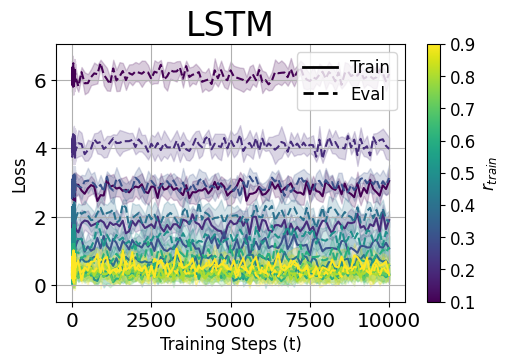

In [2]:
# Plot #1: Training Curves vs r_train
all_r_train = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
all_seed = [0, 42, 100, 200, 300]

rows, cols = 1, 1
figsize = FIGSIZE
fontsize = FONTSIZE
linewidth = LINEWIDTH
fig = plt.figure(figsize=(cols * figsize[0], rows * figsize[1]))
axs = fig.subplots(rows, cols)
ax = axs # only one axis (in pratice, you will have axis for each model and each metrics)

color_indices = np.linspace(0, 1, len(all_r_train))
colors = plt.cm.viridis(color_indices)

for j, r_train in enumerate(all_r_train):

    T = 10**4+1
    eval_first = 10**2
    eval_period = 10**2
    all_steps = list(range(eval_first)) + list(range(eval_first, T, eval_period))

    mean = np.log2(r_train)
    std = np.sqrt(r_train+1)
    train_losses = [np.abs( np.random.rand(len(all_steps)) * std  + mean).tolist() for _ in range(len(all_seed))]
    eval_losses = [np.abs(np.random.rand(len(all_steps)) * std  + mean*2).tolist() for _ in range(len(all_seed))]

    train_loss_mean = np.mean(train_losses, axis=0)
    train_loss_std = np.std(train_losses, axis=0)
    eval_loss_mean = np.mean(eval_losses, axis=0)
    eval_loss_std = np.std(eval_losses, axis=0)

    ax.plot(all_steps, train_loss_mean, '-', color=colors[j], label=r_train)
    ax.fill_between(all_steps, train_loss_mean - train_loss_std, train_loss_mean + train_loss_std, alpha=0.2, color=colors[j])
    ax.plot(all_steps, eval_loss_mean, '--', color=colors[j], label=r_train)
    ax.fill_between(all_steps, eval_loss_mean - eval_loss_std, eval_loss_mean + eval_loss_std, alpha=0.2, color=colors[j])

ax.tick_params(axis='y', labelsize='x-large')
ax.tick_params(axis='x', labelsize='x-large')
ax.set_xlabel('Training Steps (t)', fontsize=fontsize)
ax.set_ylabel('Loss', fontsize=fontsize)
ax.set_title("LSTM", fontsize=fontsize*2)
axs.grid(True)
legend_elements = [Line2D([0], [0], color='k', lw=linewidth, linestyle='-', label='Train'),
                Line2D([0], [0], color='k', lw=linewidth, linestyle='--', label='Eval')]
ax.legend(handles=legend_elements, fontsize=fontsize)


# Normal color bar
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=min(all_r_train), vmax=max(all_r_train)))
sm.set_array([])  # We only need the colormap here, no actual data
cbar = plt.colorbar(sm, ax=ax)
cbar.ax.tick_params(labelsize=fontsize)
cbar.set_label('$r_{train}$', fontsize=fontsize)
# Set the ticks to correspond to the values in `all_r_train`
cbar.set_ticks(all_r_train)  # Sets tick positions based on `all_r_train`
cbar.set_ticklabels([str(r_train) for r_train in all_r_train])  # Sets tick labels to match `all_r_train`



########################### After plotting for all axis
# Adjust layout and add padding
fig.tight_layout(pad=2)  # Adjust padding between plots
plt.subplots_adjust(right=0.85)  # Adjust right boundary of the plot to fit color bar

#plt.savefig(f"{LOG_DIR}/training_curves_vs_r_train"  + '.pdf', dpi=300, bbox_inches='tight', format='pdf')

plt.show()